Epoch 10/100, Loss: 0.1468
Epoch 20/100, Loss: 0.1463
Epoch 30/100, Loss: 0.1479
Epoch 40/100, Loss: 0.1451
Epoch 50/100, Loss: 0.1449
Epoch 60/100, Loss: 0.1386
Epoch 70/100, Loss: 0.1421
Epoch 80/100, Loss: 0.1407
Epoch 90/100, Loss: 0.1404
Epoch 100/100, Loss: 0.1382


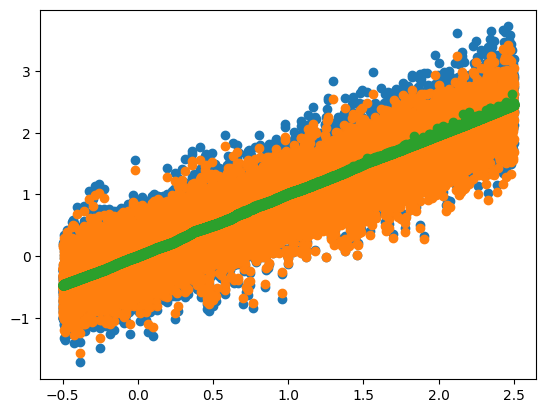

In [1]:
import os
import sys

import matplotlib.pyplot as plt
sys.path.append(r"D:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from empirical_mdn import *

# Assuming you have already generated `X`, `y_obs`, and `obs_noise_std`

n_samples = 20000
X = np.random.uniform(-.5, 2.5, (n_samples, 1))  # Example covariate (replace with your data)
  # Noisy observations
obs_noise_std = np.random.uniform(0.1, 0.5, n_samples)  # Varying noise levels
y_obs = X.squeeze()  + np.random.normal(0, obs_noise_std )
# Call the function
res = emdn_posterior_means(X, y_obs, obs_noise_std, n_epochs=100, n_gaussians=5, hidden_dim=64)
from utils import *
from numerical_routine import *
from distribution_operation import *
from posterior_computation import *
from ash import *

res_ash = ash( y_obs, obs_noise_std)
# posterior_means now contains the posterior means for the observations
  # Print the first 5 posterior means
plt.scatter(X.squeeze(), y_obs, label='Y obs' )
plt.scatter(X.squeeze(),res_ash.post_mean, label='post mean ash' )
plt.scatter(X.squeeze(),res.post_mean, label='post mean mdn' )



In [2]:




mse_noisy = np.mean(( y_obs- X.squeeze())**2)
mse_ash = np.mean (( res_ash.post_mean - X.squeeze())**2)
mse_true = np.mean((res.post_mean - X.squeeze())**2)
print(f"\nMean Squared Error:")
print(f"MSE (Est Post vs Y Noisy): {mse_noisy:.4f}")
print(f"MSE (Ash Post vs Y True): {mse_ash:.4f}")
print(f"MSE (Est Post vs Y True): {mse_true:.4f}")

 


Mean Squared Error:
MSE (Est Post vs Y Noisy): 0.1055
MSE (Ash Post vs Y True): 0.0963
MSE (Est Post vs Y True): 0.0004


In [3]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(r"D:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from empirical_mdn import *

n_samples = 20000
y = np.random.uniform(-.5, 2.5, n_samples)
X = y.reshape(-1, 1)  # Reshape y into a 2D array (n_samples, 1)
xtrue = np.zeros_like(y)

# Apply conditions to generate xtrue based on y
for i in range(len(xtrue)):
    if (0 < y[i] < 0.5) or (1.5 < y[i] < 2):
        xtrue[i] = np.random.normal(1, scale=0.5)
    else:
        xtrue[i] = np.random.normal(-1, scale=0.5)

obs_noise_std = np.random.uniform(0.5,  1.5, len(xtrue))  # Varying noise levels
# Generate x (noisy observations)
x = xtrue + np.random.normal(0, obs_noise_std, len(xtrue))

# Call the compute_posterior_means function (note the reshaped X=y.reshape(-1, 1))
res = emdn_posterior_means(X=X, betahat=x, sebetahat=obs_noise_std,n_layers=10,
                           n_epochs=10, n_gaussians=10, hidden_dim=64, lr=0.01)



Epoch 10/10, Loss: 1.5563


In [4]:
obs_noise_std[]

SyntaxError: invalid syntax (206773636.py, line 1)

In [8]:
post_mean_oracle =np.zeros_like(y)
for i in range(len(xtrue)):
        if (0 < y[i] < 0.5) or (1.5 < y[i] < 2):
                location = 1
        else:
                location = -1

        
        t_ind_Var = np.concatenate(
                                        ([0], 
                                         1/((1/obs_noise_std[i]**2)+ (1/0.5**2)) )
                                        )#assume that first entry of scale is 0
        
 
        post_mean_oracle[i]  =   (t_ind_Var /(obs_noise_std[i]**2))*(betahat[i] )+ location*(1-t_ind_Var[i,]/(obs_noise_std[i]**2))

 

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 0 dimension(s)

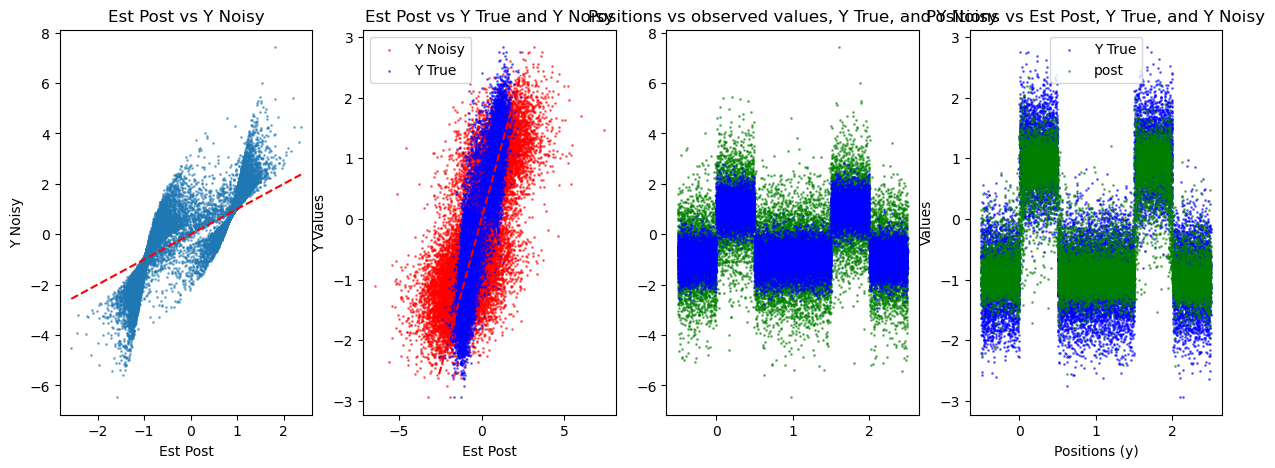

In [4]:
est_post= res.post_mean

plt.figure(figsize=(15, 5))

# Plot 1: Est Post vs Y Noisy
plt.subplot(1, 4, 1)
plt.scatter(est_post, x, alpha=0.5, s=1)
plt.title('Est Post vs Y Noisy')
plt.xlabel('Est Post')
plt.ylabel('Y Noisy')
plt.plot([min(est_post), max(est_post)], [min(est_post), max(est_post)], 'r--')

# Plot 2: Est Post vs Y True
plt.subplot(1, 4, 2)
plt.scatter(x, xtrue, alpha=0.5, s=1, label='Y Noisy', color='red')

plt.scatter(est_post, xtrue, alpha=0.5, s=1, label='Y True', color='blue')
plt.title('Est Post vs Y True and Y Noisy')
plt.xlabel('Est Post')
plt.ylabel('Y Values')
plt.legend()
plt.plot([min(est_post), max(est_post)], [min(est_post), max(est_post)], 'r--')

# Plot 3: Positions vs Est Post, Y True, and Y Noisy
plt.subplot(1, 4, 3)
#plt.scatter(y, y_n_np, alpha=0.5, s=1, label='Y Noisy', color='red')

plt.scatter(y, x, alpha=0.5, s=1, label='Y True', color='green')
plt.scatter(y, xtrue, alpha=0.5, s=1, label='Y True', color='blue')
#plt.scatter(y, x, alpha=0.5, s=1, label='Y True', color='green')
plt.title('Positions vs observed values, Y True, and Y Noisy')
plt.subplot(1,4,4)
plt.scatter(y, xtrue, alpha=0.5, s=1, label='Y True', color='blue')

plt.scatter(y, est_post, alpha=0.5, s=1, label='post', color='green')
plt.title('Positions vs Est Post, Y True, and Y Noisy')
plt.xlabel('Positions (y)')
plt.ylabel('Values')
plt.legend()

In [5]:
from utils import *
from numerical_routine import *
from distribution_operation import *
from posterior_computation import *
from ash import *

res_ash = ash( x, np.full(x .shape[0],1))
mse_noisy = np.mean((xtrue - x)**2)
mse_ash = np.mean (( res_ash.post_mean - xtrue)**2)

mse_true = np.mean((est_post - xtrue)**2)
print(f"\nMean Squared Error:")
print(f"MSE (Est Post vs Y Noisy): {mse_noisy:.4f}")
print(f"MSE (Ash Post vs Y True): {mse_ash:.4f}")
print(f"MSE (Est Post vs Y True): {mse_true:.4f}")



Mean Squared Error:
MSE (Est Post vs Y Noisy): 1.0747
MSE (Ash Post vs Y True): 0.6528
MSE (Est Post vs Y True): 0.2457


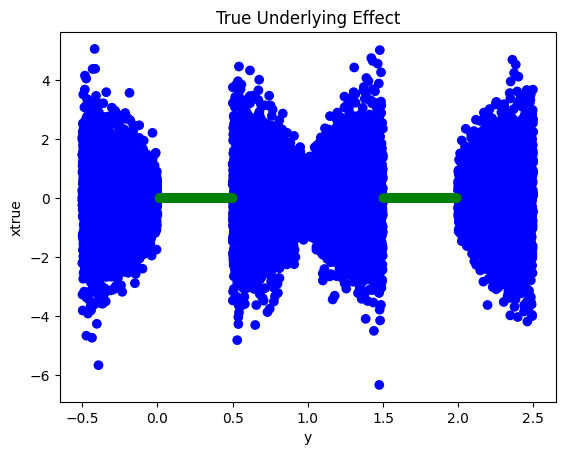

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
# Set random seed for reproducibility
np.random.seed(1)
torch.manual_seed(1)

# Generate data
n_samples = 20000
y = np.random.uniform(-.5, 2.5, n_samples)
X = y.reshape(-1, 1)
xtrue = np.zeros_like(y)

# Apply conditions to generate xtrue based on y
for i in range(len(xtrue)):
    if (0 < y[i] < 0.5) or (1.5 < y[i] < 2):
        xtrue[i] = 0
    else:
        xtrue[i] = np.random.normal(0, scale=0.5 + 1 * abs(np.sin(np.pi * y[i])))

# Generate x and s
x = xtrue + np.random.normal(0, 1, len(xtrue))
s = np.ones_like(x)
Z = np.ones((n_samples, 1))

# Plot the results
plt.scatter(y, xtrue, c=np.where(xtrue == 0, 'green', 'blue'))
plt.title('True Underlying Effect')
plt.xlabel('y')
plt.ylabel('xtrue')
plt.show()


In [8]:
from empirical_mdn import *

res = emdn_posterior_means(X=X, betahat=x, sebetahat=obs_noise_std, n_epochs=100, n_gaussians=20, hidden_dim=64, n_layers=6)

Epoch 10/100, Loss: 1.7321
Epoch 20/100, Loss: 1.7320
Epoch 30/100, Loss: 1.7321
Epoch 40/100, Loss: 1.7315
Epoch 50/100, Loss: 1.7303
Epoch 60/100, Loss: 1.7314
Epoch 70/100, Loss: 1.7307
Epoch 80/100, Loss: 1.7291
Epoch 90/100, Loss: 1.7296
Epoch 100/100, Loss: 1.7302


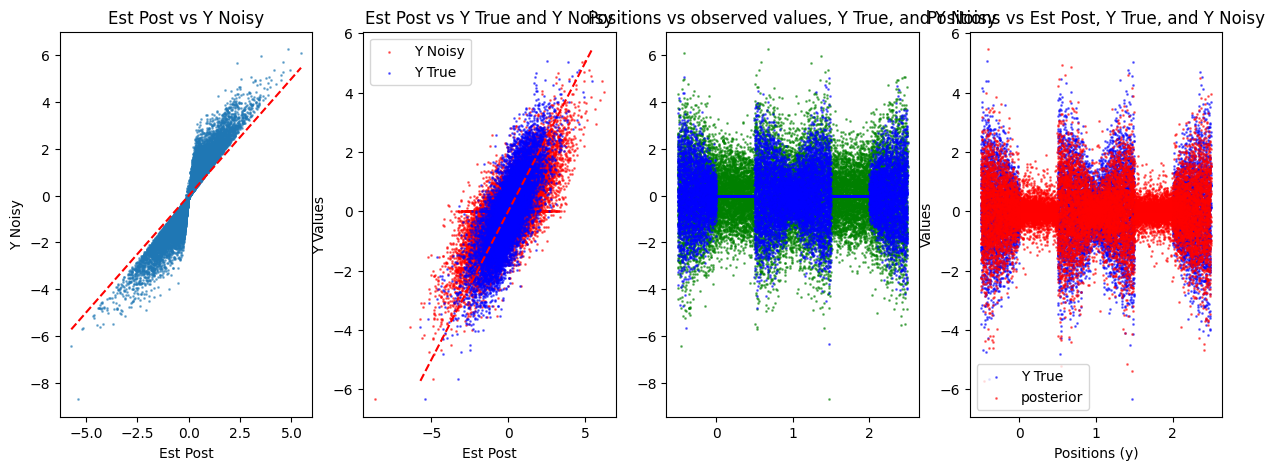

In [9]:
est_post= res.post_mean

plt.figure(figsize=(15, 5))

# Plot 1: Est Post vs Y Noisy
plt.subplot(1, 4, 1)
plt.scatter(est_post, x, alpha=0.5, s=1)
plt.title('Est Post vs Y Noisy')
plt.xlabel('Est Post')
plt.ylabel('Y Noisy')
plt.plot([min(est_post), max(est_post)], [min(est_post), max(est_post)], 'r--')

# Plot 2: Est Post vs Y True
plt.subplot(1, 4, 2)
plt.scatter(x, xtrue, alpha=0.5, s=1, label='Y Noisy', color='red')

plt.scatter(est_post, xtrue, alpha=0.5, s=1, label='Y True', color='blue')
plt.title('Est Post vs Y True and Y Noisy')
plt.xlabel('Est Post')
plt.ylabel('Y Values')
plt.legend()
plt.plot([min(est_post), max(est_post)], [min(est_post), max(est_post)], 'r--')

# Plot 3: Positions vs Est Post, Y True, and Y Noisy
plt.subplot(1, 4, 3)
#plt.scatter(y, y_n_np, alpha=0.5, s=1, label='Y Noisy', color='red')

plt.scatter(y, x, alpha=0.5, s=1, label='Y True', color='green')
plt.scatter(y, xtrue, alpha=0.5, s=1, label='Y True', color='blue')
#plt.scatter(y, x, alpha=0.5, s=1, label='Y True', color='green')
plt.title('Positions vs observed values, Y True, and Y Noisy')
plt.subplot(1,4,4)
plt.scatter(y, xtrue, alpha=0.5, s=1, label='Y True', color='blue')

plt.scatter(y, est_post, alpha=0.5, s=1, label='posterior', color='red')
plt.title('Positions vs Est Post, Y True, and Y Noisy')
plt.xlabel('Positions (y)')
plt.ylabel('Values')
plt.legend()

In [ ]:
from utils import *
from numerical_routine import *
from distribution_operation import *
from posterior_computation import *
from ash import *

res_ash = ash( x, np.full(x .shape[0],1))
mse_noisy = np.mean((xtrue - x)**2)
mse_ash = np.mean (( res_ash.post_mean - xtrue)**2)

mse_true = np.mean((est_post - xtrue)**2)
print(f"\nMean Squared Error:")
print(f"MSE (Est Post vs Y Noisy): {mse_noisy:.4f}")
print(f"MSE (Ash Post vs Y True): {mse_ash:.4f}")
print(f"MSE (Est Post vs Y True): {mse_true:.4f}")



Mean Squared Error:
MSE (Est Post vs Y Noisy): 1.0125
MSE (Ash Post vs Y True): 0.4658
MSE (Est Post vs Y True): 0.4392


: 